### DOMAIN:
Automobile
### CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.The vehicle may be viewed from one of many different angles.
### DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.<br/>
All the features are numeric i.e. geometric features extracted from the silhouette.
### PROJECT OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.

In [39]:
#Loading the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
#import the dataset
ve = pd.read_csv('./Part3 - vehicle.csv')
ve.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
#checking for the dimension of the data
rows, column = ve.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


In [4]:
#checking for the data type
print('The data type of each attribute: \n')
ve.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null  

In [5]:
print('Duplicated rows: ', ve[ve.duplicated()].shape[0])

Duplicated rows:  0


In [6]:
print('Null values:\n', ve.isnull().sum())

Null values:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


There appears to be quite a few missing values

In [7]:
#replacing the missing values with median values
for cols in ve.columns:
    if(cols != 'class'): 
        ve[cols] = ve[cols].fillna(ve[cols].median())

In [8]:
#5-point summary
ve.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


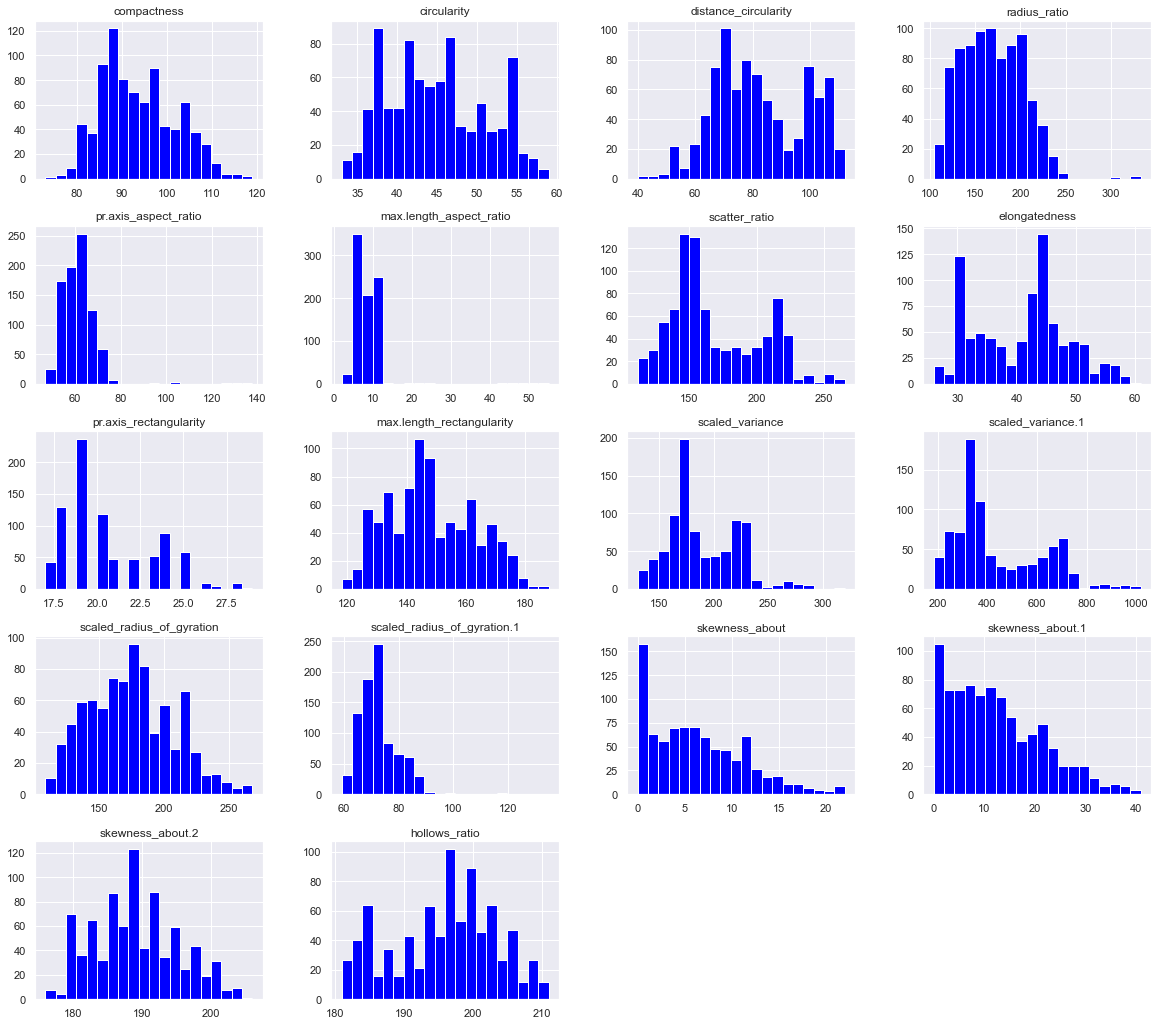

In [9]:
#plotting the distribution of the numerical variables
ve.hist(bins = 20, figsize = (20, 18), color = 'blue')
plt.show()

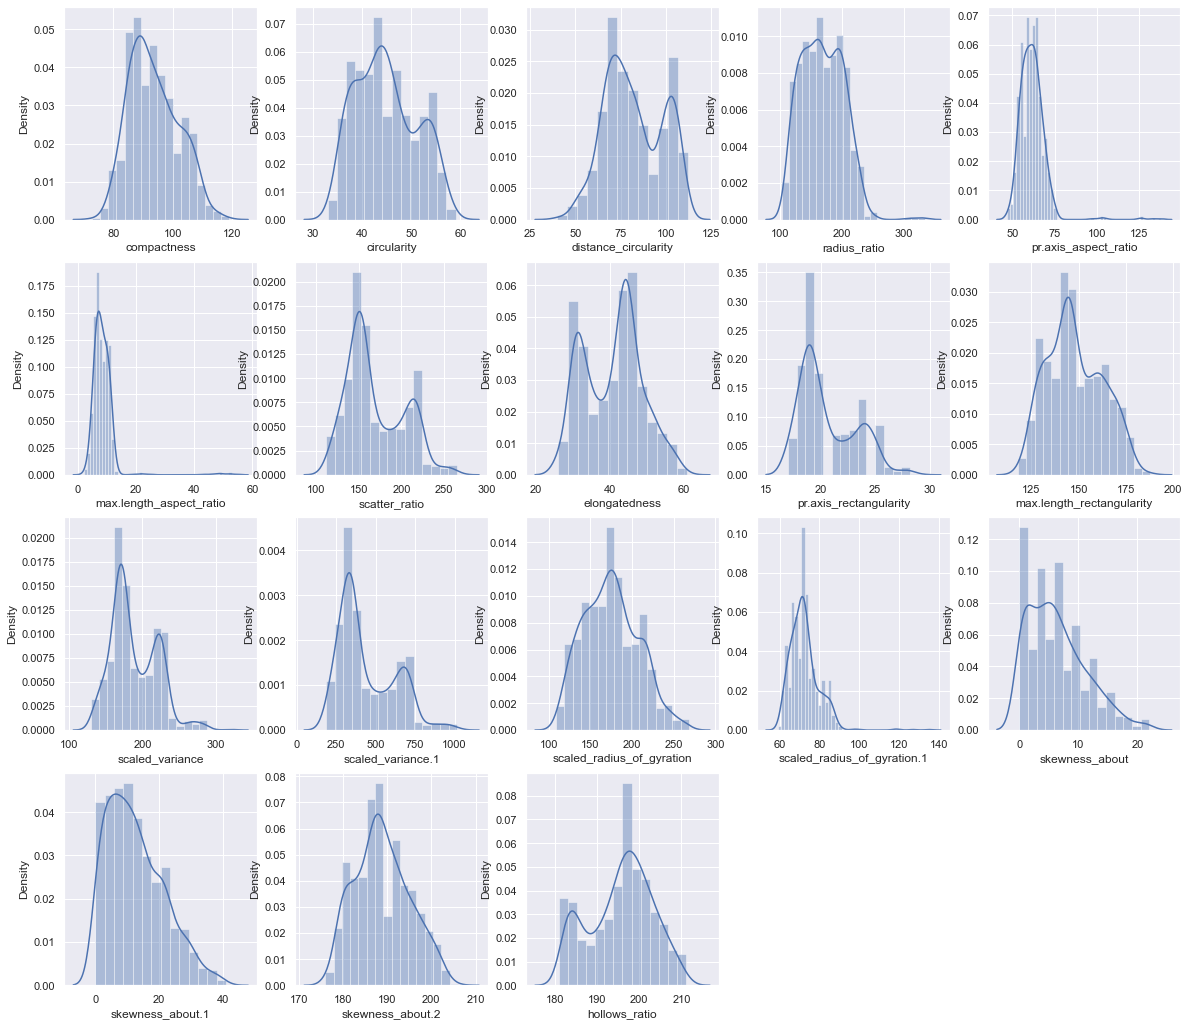

In [14]:
#Density plots
plt.figure(figsize=(20, 18))
col = 1
for i in ve.drop(columns='class').columns:
    plt.subplot(4, 5, col)
    sns.distplot(ve[i], color = 'b')
    col += 1 

Columns have data distributed across multiple scales.
Several columns have distributions that are not unimodal (eg.: distance_circularity, hollows_ratio, elongatedness
Column skweness_about, skewness_about.1 have data that is right skewed whereas for column skewness_about.2 data is nearly normally distributed.
Some columns have long right tail (eg.: pr.axis_aspect_ratio) as evident from the above distplot it is highly likely that they will have outliers.

car    429
bus    218
van    199
Name: class, dtype: int64


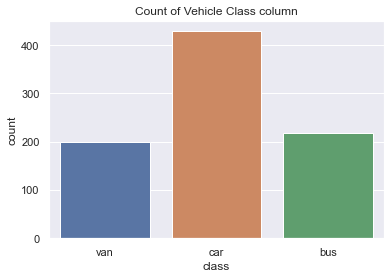

In [15]:
#checking the distribution of the class variable
print(ve['class'].value_counts())
plt.title('Count of Vehicle Class column')
sns.countplot(x = 'class', data = ve);

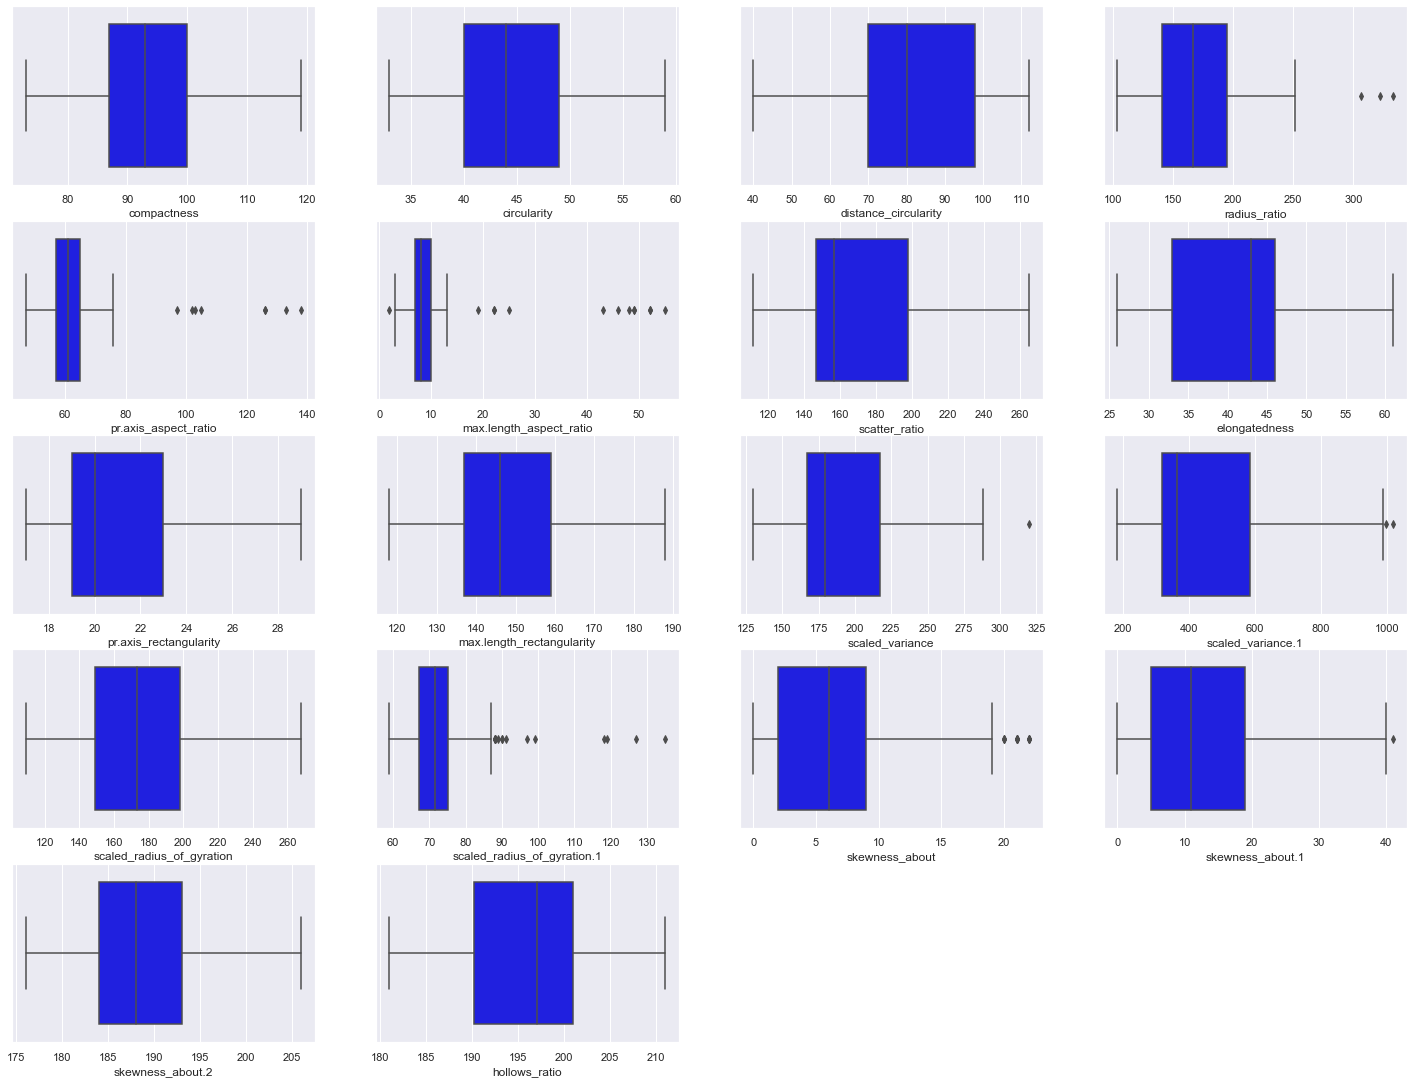

In [16]:
#boxplots for outliers
plt.figure(figsize=(25,23))
col = 1
for i in ve.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(ve[i],color='blue')
    col += 1

Above Boxplots reveal that there are outliers in 8 different columns., will have them treated eventually

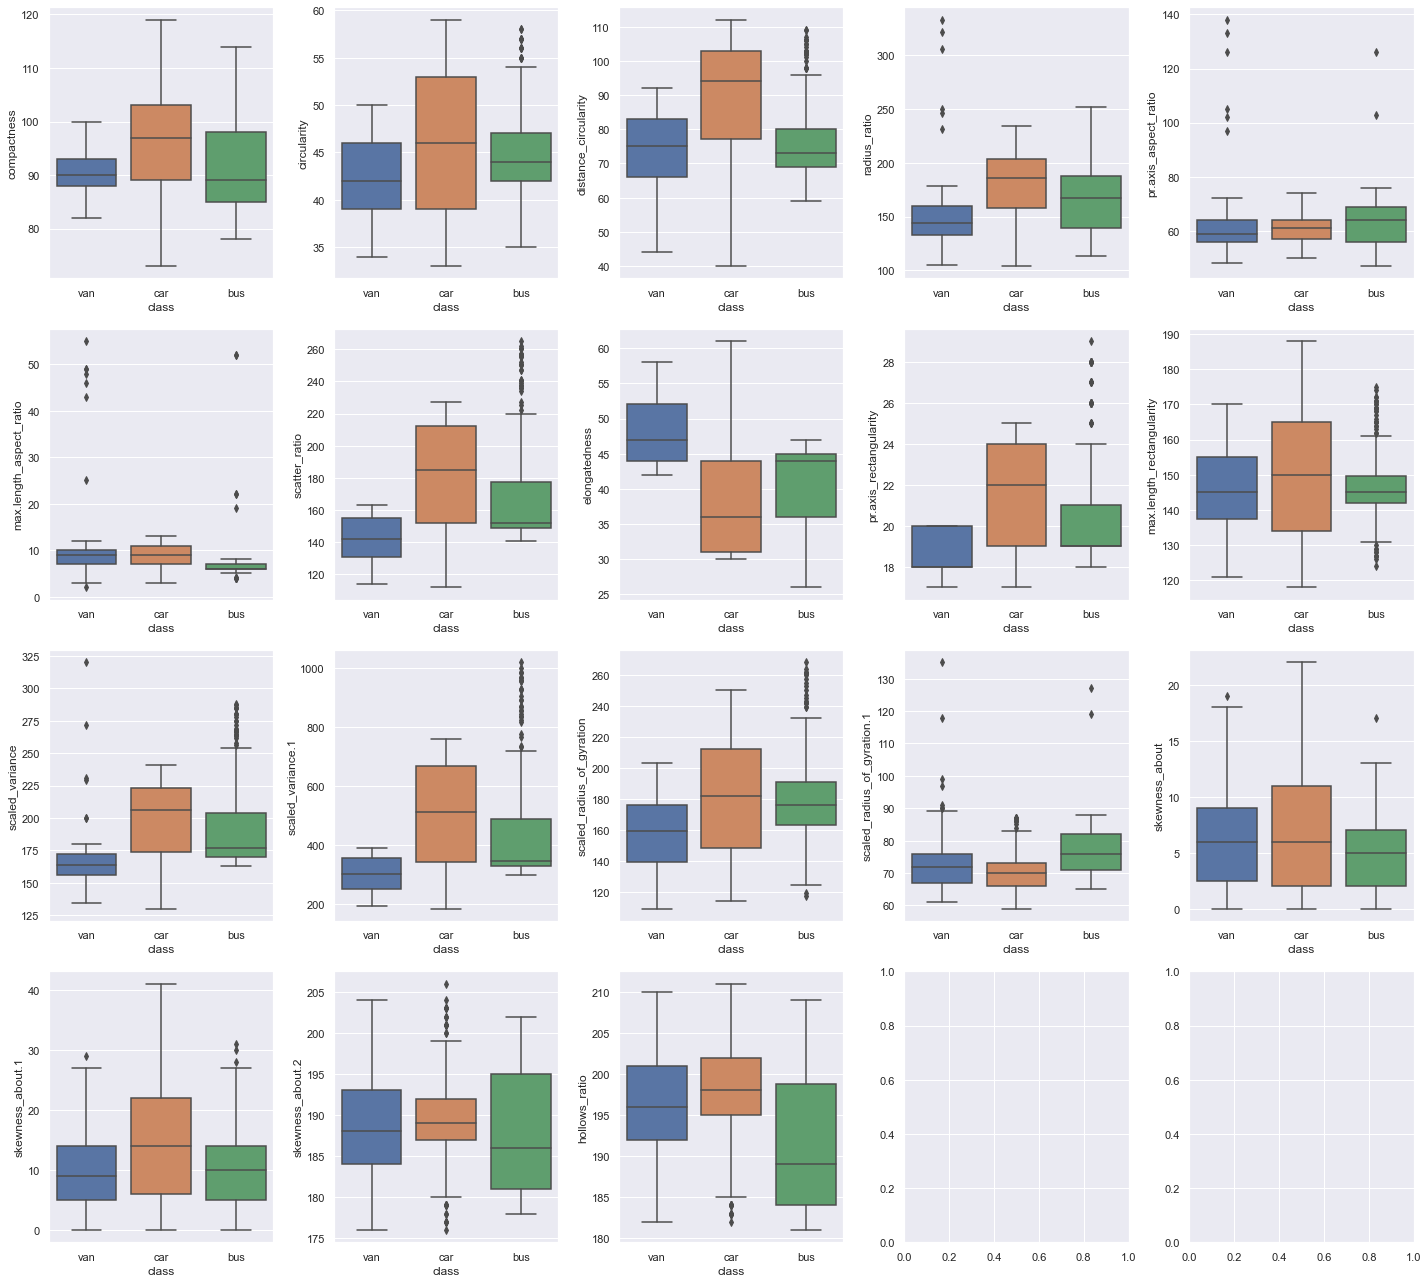

In [17]:
#Boxplots against the class with other numeric variables
fig,axs = plt.subplots(4,5,figsize=(20,18))
sns.boxplot(x="class", y="compactness",data=ve,ax=axs[0,0]);
sns.boxplot(x="class", y="circularity",data=ve,ax=axs[0,1]);
sns.boxplot(x="class", y="distance_circularity",data=ve,ax=axs[0,2]);
sns.boxplot(x="class", y="radius_ratio",data=ve,ax=axs[0,3]);
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=ve,ax=axs[0,4]);
sns.boxplot(x="class", y="max.length_aspect_ratio",data=ve,ax=axs[1,0]);
sns.boxplot(x="class", y="scatter_ratio",data=ve,ax=axs[1,1]);
sns.boxplot(x="class", y="elongatedness",data=ve,ax=axs[1,2]);
sns.boxplot(x="class", y="pr.axis_rectangularity",data=ve,ax=axs[1,3]);
sns.boxplot(x="class", y="max.length_rectangularity",data=ve,ax=axs[1,4]);
sns.boxplot(x="class", y="scaled_variance",data=ve,ax=axs[2,0]);
sns.boxplot(x="class", y="scaled_variance.1",data=ve,ax=axs[2,1]);
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=ve,ax=axs[2,2]);
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=ve,ax=axs[2,3]);
sns.boxplot(x="class", y="skewness_about",data=ve,ax=axs[2,4]);
sns.boxplot(x="class", y="skewness_about.1",data=ve,ax=axs[3,0]);
sns.boxplot(x="class", y="skewness_about.2",data=ve,ax=axs[3,1]);
sns.boxplot(x="class", y="hollows_ratio",data=ve,ax=axs[3,2]);
fig.tight_layout()

There is significant difference between classes when compared with the mean and median with all the numeric attributes

In [18]:
#find the outliers and replace them by median
for col_name in ve.drop(columns = 'class').columns:
    q1 = ve[col_name].quantile(0.25)
    q3 = ve[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    ve.loc[(ve[col_name] < low) | (ve[col_name] > high), col_name] = ve[col_name].median()

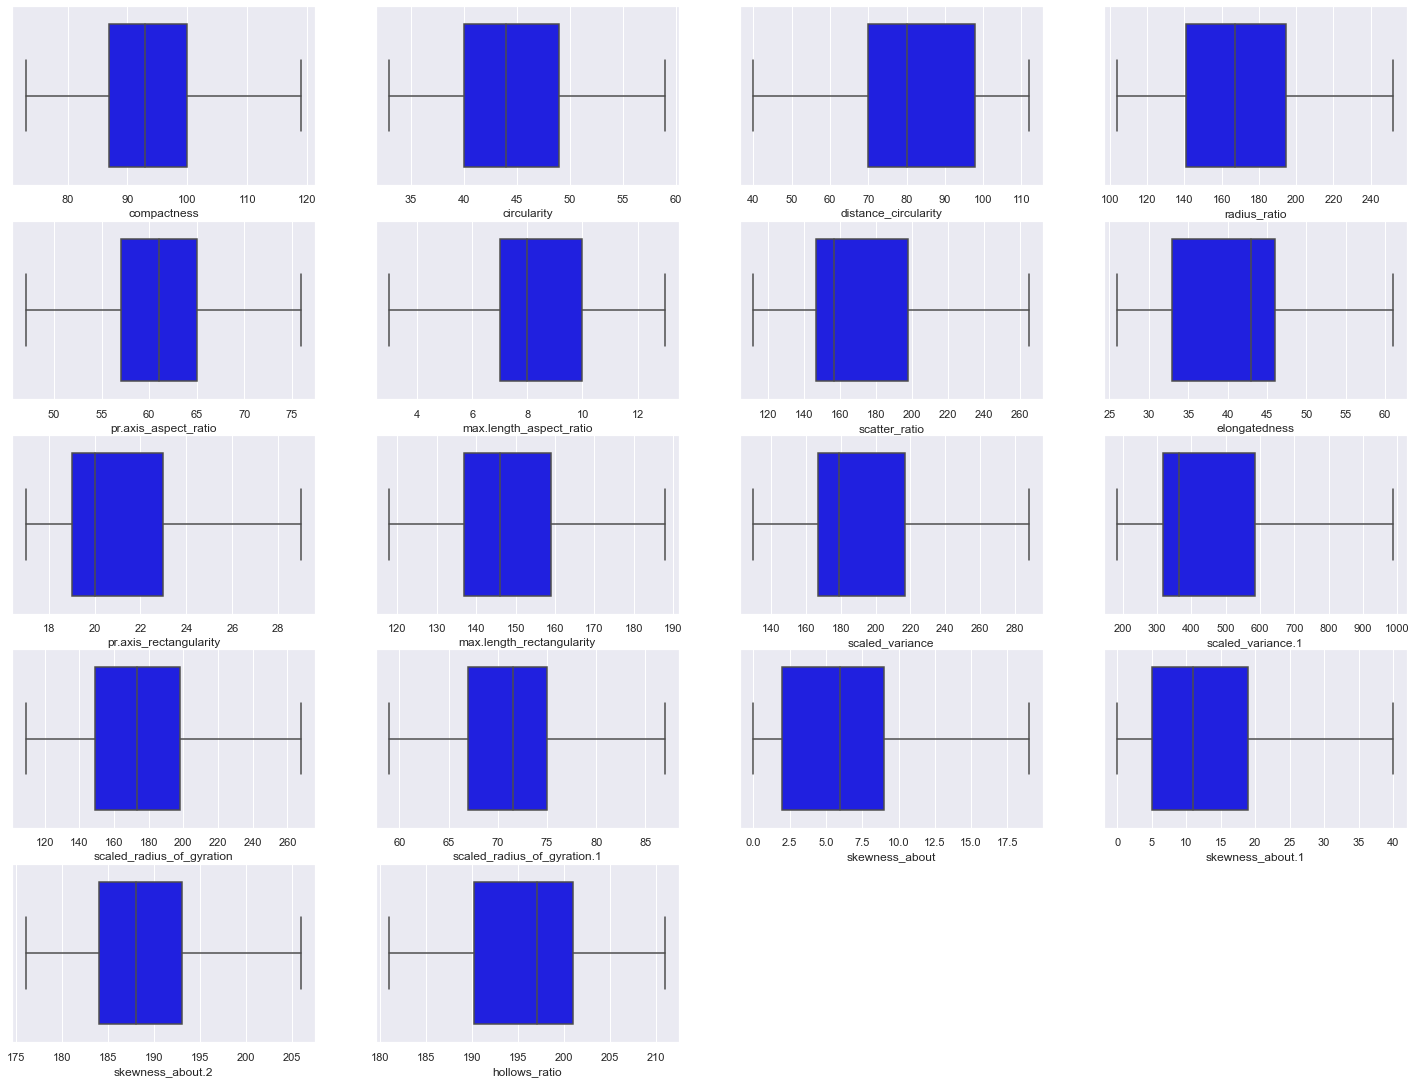

In [19]:
#boxplot after outlier treatment
plt.figure(figsize=(25,23))
col = 1
for i in ve.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(ve[i],color='blue')
    col += 1

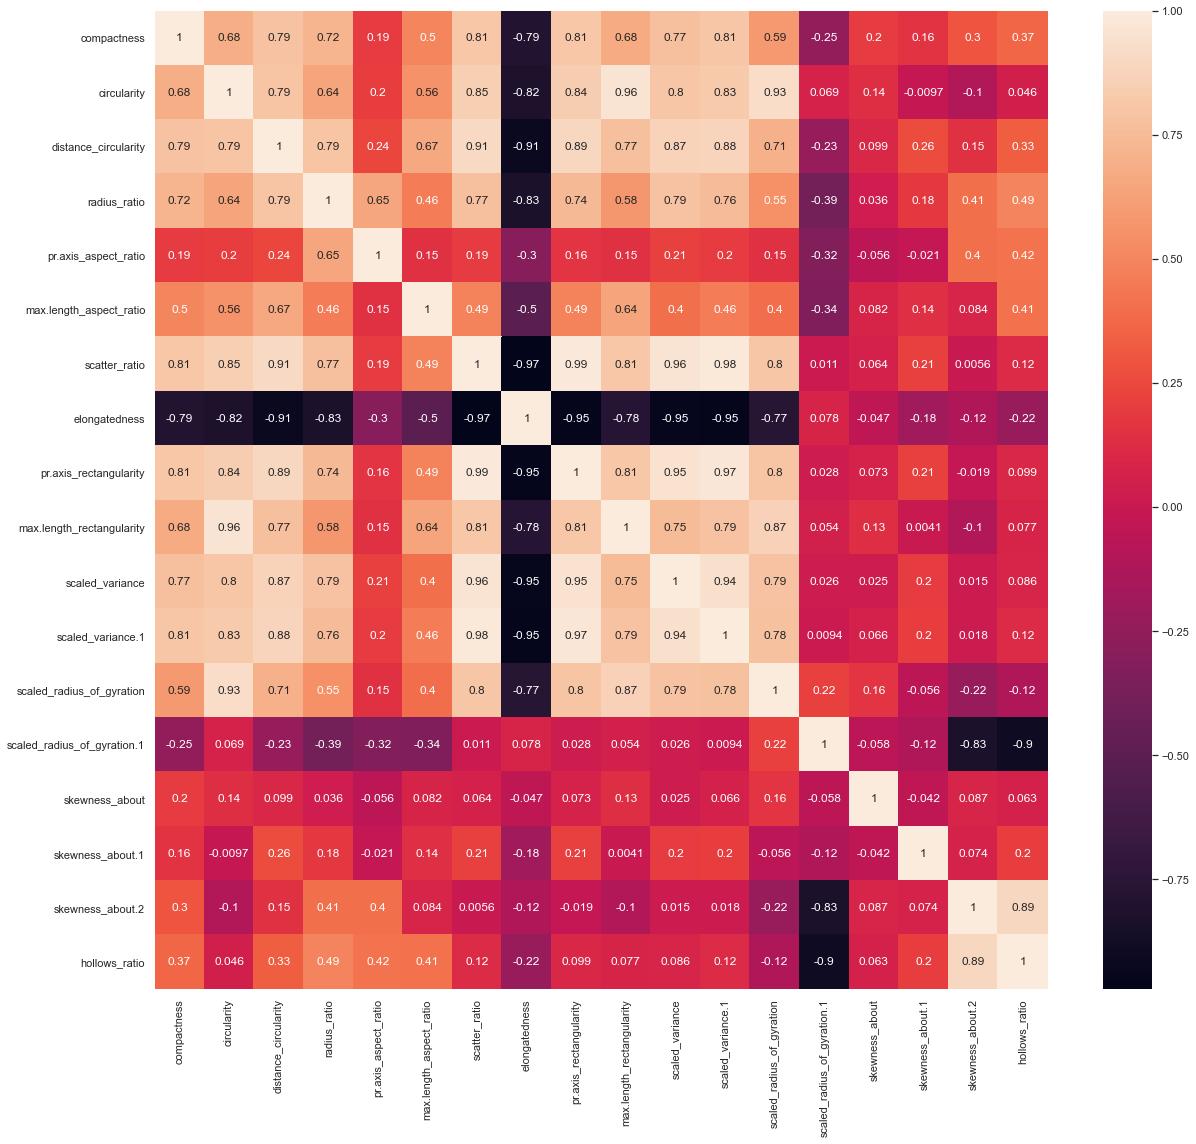

In [20]:
#checking for correlation
plt.figure(figsize=(20,18))
corr=ve.corr()
sns.heatmap(corr,annot=True);

In [22]:
#spliiting the data to check for correlation with the class variable
X = ve.loc[:, ve.columns != 'class']
y = ve['class'].astype('category').cat.codes

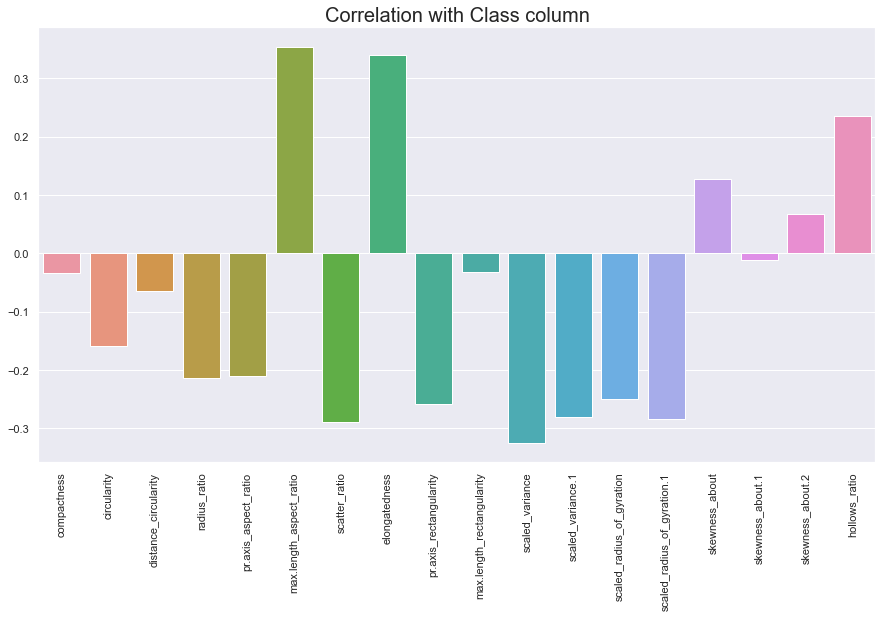

In [23]:
#plotting the correlation with target variable
plt.figure(figsize = (15, 8))
ax=sns.barplot(x=X.columns, y = X.corrwith(y))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)
x=plt.setp(ax.get_xticklabels(), rotation=90)

## PCA

In [24]:
#scaling the muerica variables
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.300945,1.933135,0.912212,-0.207598,0.136262,-0.224342,0.758332,-0.400771,-0.337407,0.285705,-0.315806,-0.032330,0.387162,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850666,-0.740596,0.427456,-0.599423,0.520519,-0.610886,-0.344578,-0.594220,-0.618623,-0.513630,0.009122,0.624090,0.161740,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265808,0.863642,0.912212,1.148719,-1.144597,0.935290,0.689401,1.114582,1.131806,1.392477,0.171586,1.718123,-0.401818,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290423,0.328896,0.427456,-0.750125,0.648605,-0.610886,-0.344578,-0.916635,-0.739145,-1.466683,-1.453054,-0.032330,-0.289106,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141310,-0.027601,-0.057300,-0.599423,0.520519,-0.610886,-0.275646,1.694930,-0.647319,0.408680,-0.072110,0.624090,-0.176395,-1.450481,-1.699181


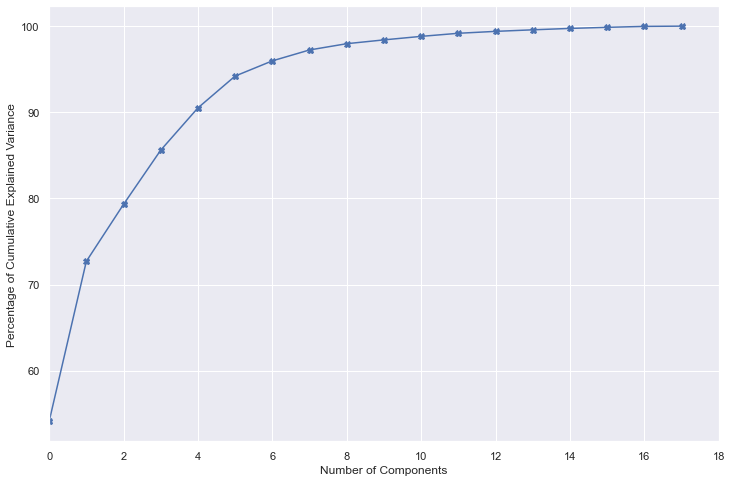

In [26]:
#plotting the cummulative variance explained by the principal componets
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

In [97]:
print(pca.explained_variance_)

[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 4.01448646e-02 3.22758478e-02 2.93936408e-02 2.27005257e-02
 1.98136761e-02 5.16287320e-03]


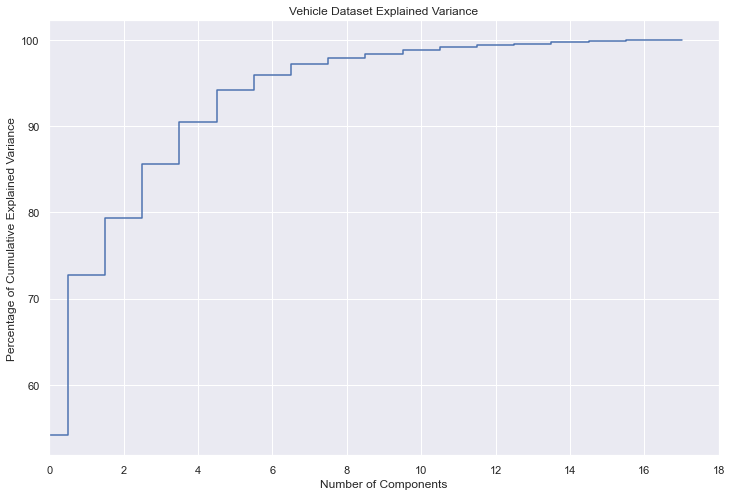

In [99]:
#plotting the
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

We can see that the first six components explain more than 95% of variation.
Between first 5 components, more than 91% of the information is captured.
The above plot shows almost 95% variance by the first 6 components. Therefore we can drop 7th component onwards.

In [28]:
#Using 6 components and printing the eigen vectors
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374436  0.12360146 -0.63489336
   0.08555745 -0.07907344  0.08164

In [30]:
#printing the original features and the reduced features
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [31]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5
0,0.584228,-0.675673,-0.453334,-0.750656,-0.777515,-1.848809
1,-1.512180,-0.348934,-0.333436,1.268953,-0.324929,-0.118317
2,3.913448,0.234507,-1.265094,0.137224,0.915751,-0.685594
3,-1.535193,-3.044413,-0.469623,0.324317,-0.611590,0.367777
4,-0.642062,1.488882,-0.246288,-0.550939,0.471655,-1.012698


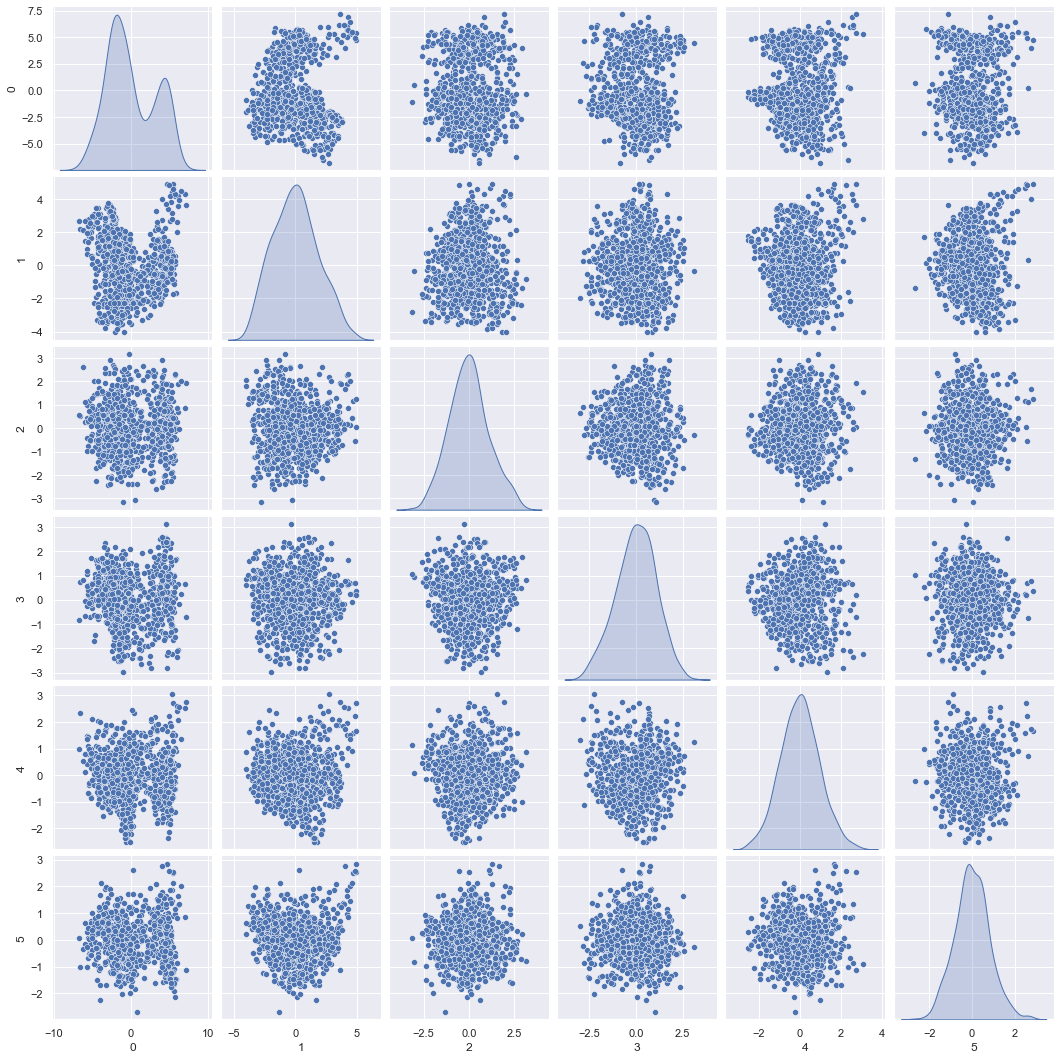

In [32]:
sns.pairplot(pca_df, diag_kind = 'kde');

## SVM

In [33]:
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [34]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 592 rows and 18 columns.


In [35]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 254 rows and 18 columns.


In [36]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [37]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 592 rows and 6 columns.


In [38]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 254 rows and 6 columns.


In [40]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [41]:
#predicting on train data
sv_train_predict = svc_model .predict(X_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9899



In [42]:
#predicting on test data
sv_test_predict = svc_model .predict(X_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9685



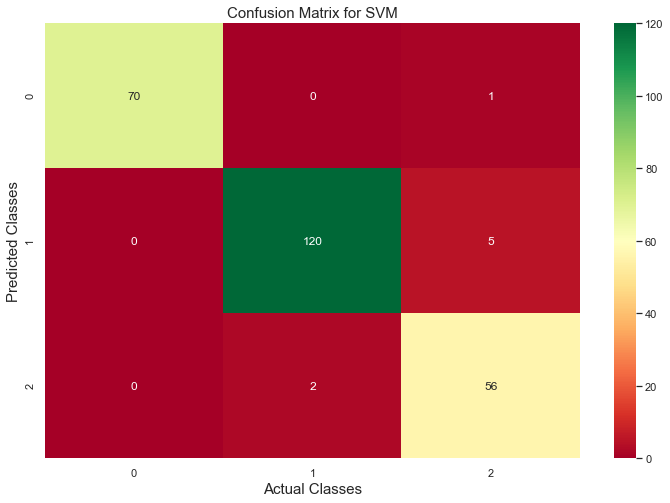

In [43]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [44]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [45]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)


Precision Score : 0.96
Recall Score : 0.97
F1-Score: 0.97
Accuracy Score : 0.97


In [46]:
#SVM on the pca data
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [47]:
#predicting on train data
sv_tr_predict = svc_model_pca .predict(X_tr)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_tr, sv_tr_predict)))
print()

Model Accuracy on train: 0.9476



In [48]:
#predicting on test data
sv_te_predict = svc_model_pca .predict(X_te)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_te, sv_te_predict)))
print()

Model Accuracy on test: 0.9213



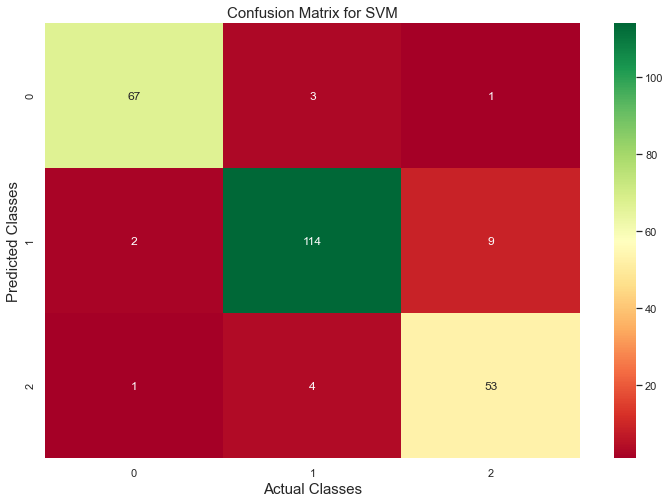

In [49]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [50]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.94      0.91      0.93       125
           2       0.84      0.91      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



In [51]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)


Precision Score : 0.91
Recall Score : 0.92
F1-Score: 0.92
Accuracy Score : 0.92


In [52]:
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,96.850394,97.047758,96.227745,96.596702
1,Support Vector Classifier with PCA,92.125984,92.315169,91.352049,91.773898


Bothe the model give more than 90% accuracy on the test data, PCA used only 6 attributes to come up with an accuracy of 90%+ where as the model without pca used all the variables to come up with 90%+ accuracy, the difference can be illustrated even better if the dataset had been cursed with dimensionality, since its 18 variable in the original data the difference is very subtle.